# Working with Unlabeled Data – Cluster Analysis
Find the best number of clusters with __k_means__ and __agglomerative clustering__

## Overview

1. Load the data file
    - check the shape and plot the content  
1. Observe the pair plot and comment the shapes in view of clustering 
    1. if necessary, transform the data
1. Use the elbow method to find the optimal number of clusters, to do this test `KMeans` with varying number of clusters, from 2 to 10: for each value of `k` 
    - fit the data
    - compute the __inertia__ and the __silhouette score__  
    - store them for plot
1. Plot inertia and silhouette score versus `k`
1. Choose the optimal number of clusters looking at the plots
1. Cluster the data using the optimal number, plot the cluster assignment 
    - in the plot choose the features that seem to be most promising
1. For comparison, repeat the same operation with the `AgglomerativeClustering`
        

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

random_state = 42 # This variable will be used in all the procedure calls allowing a random_state parameter
               # in this way the running can be perfectly reproduced
               # just change this value for a different experiment

## 1. Load the data file
Check the shape and plot the content 

In [2]:
X_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
# to fill

(440, 8)

In [3]:
# to fill

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


## 2. Observe the data distributions

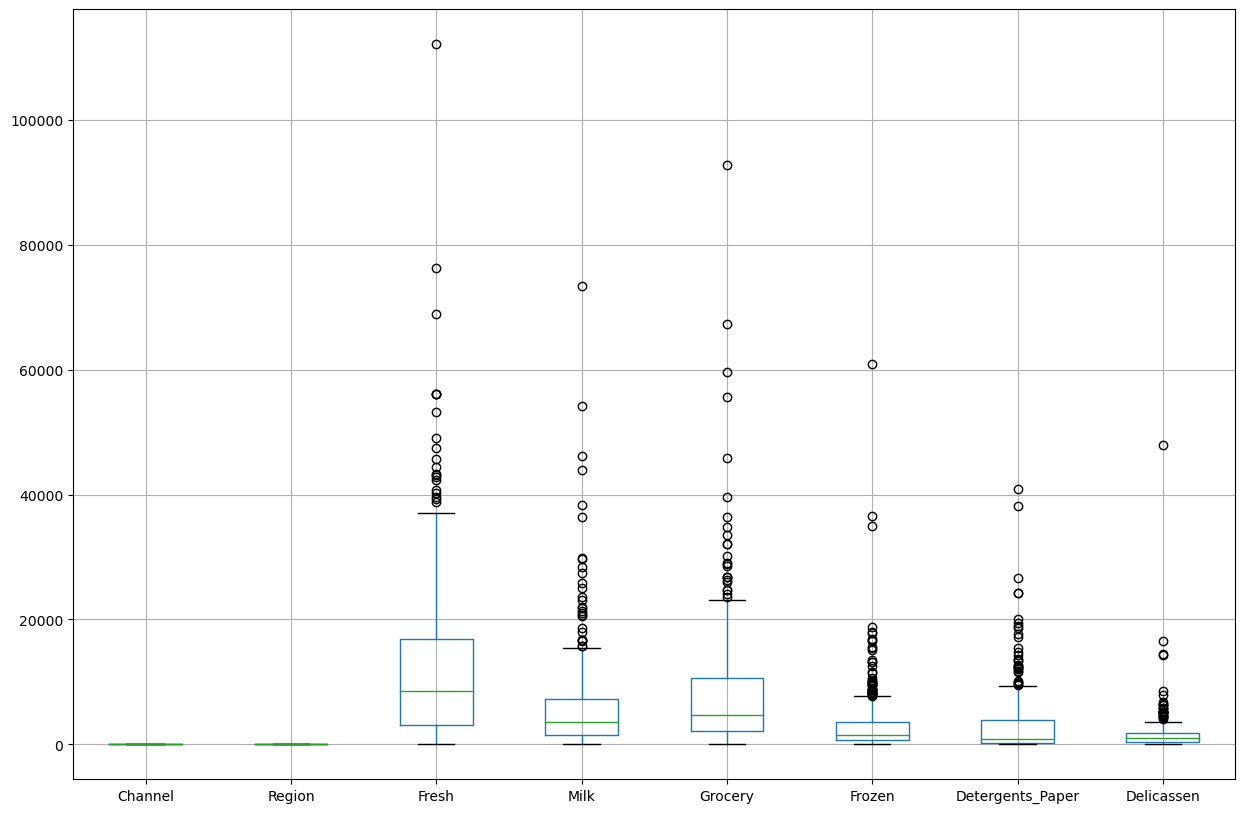

In [4]:
# produce a boxplot of the columns
# to fill

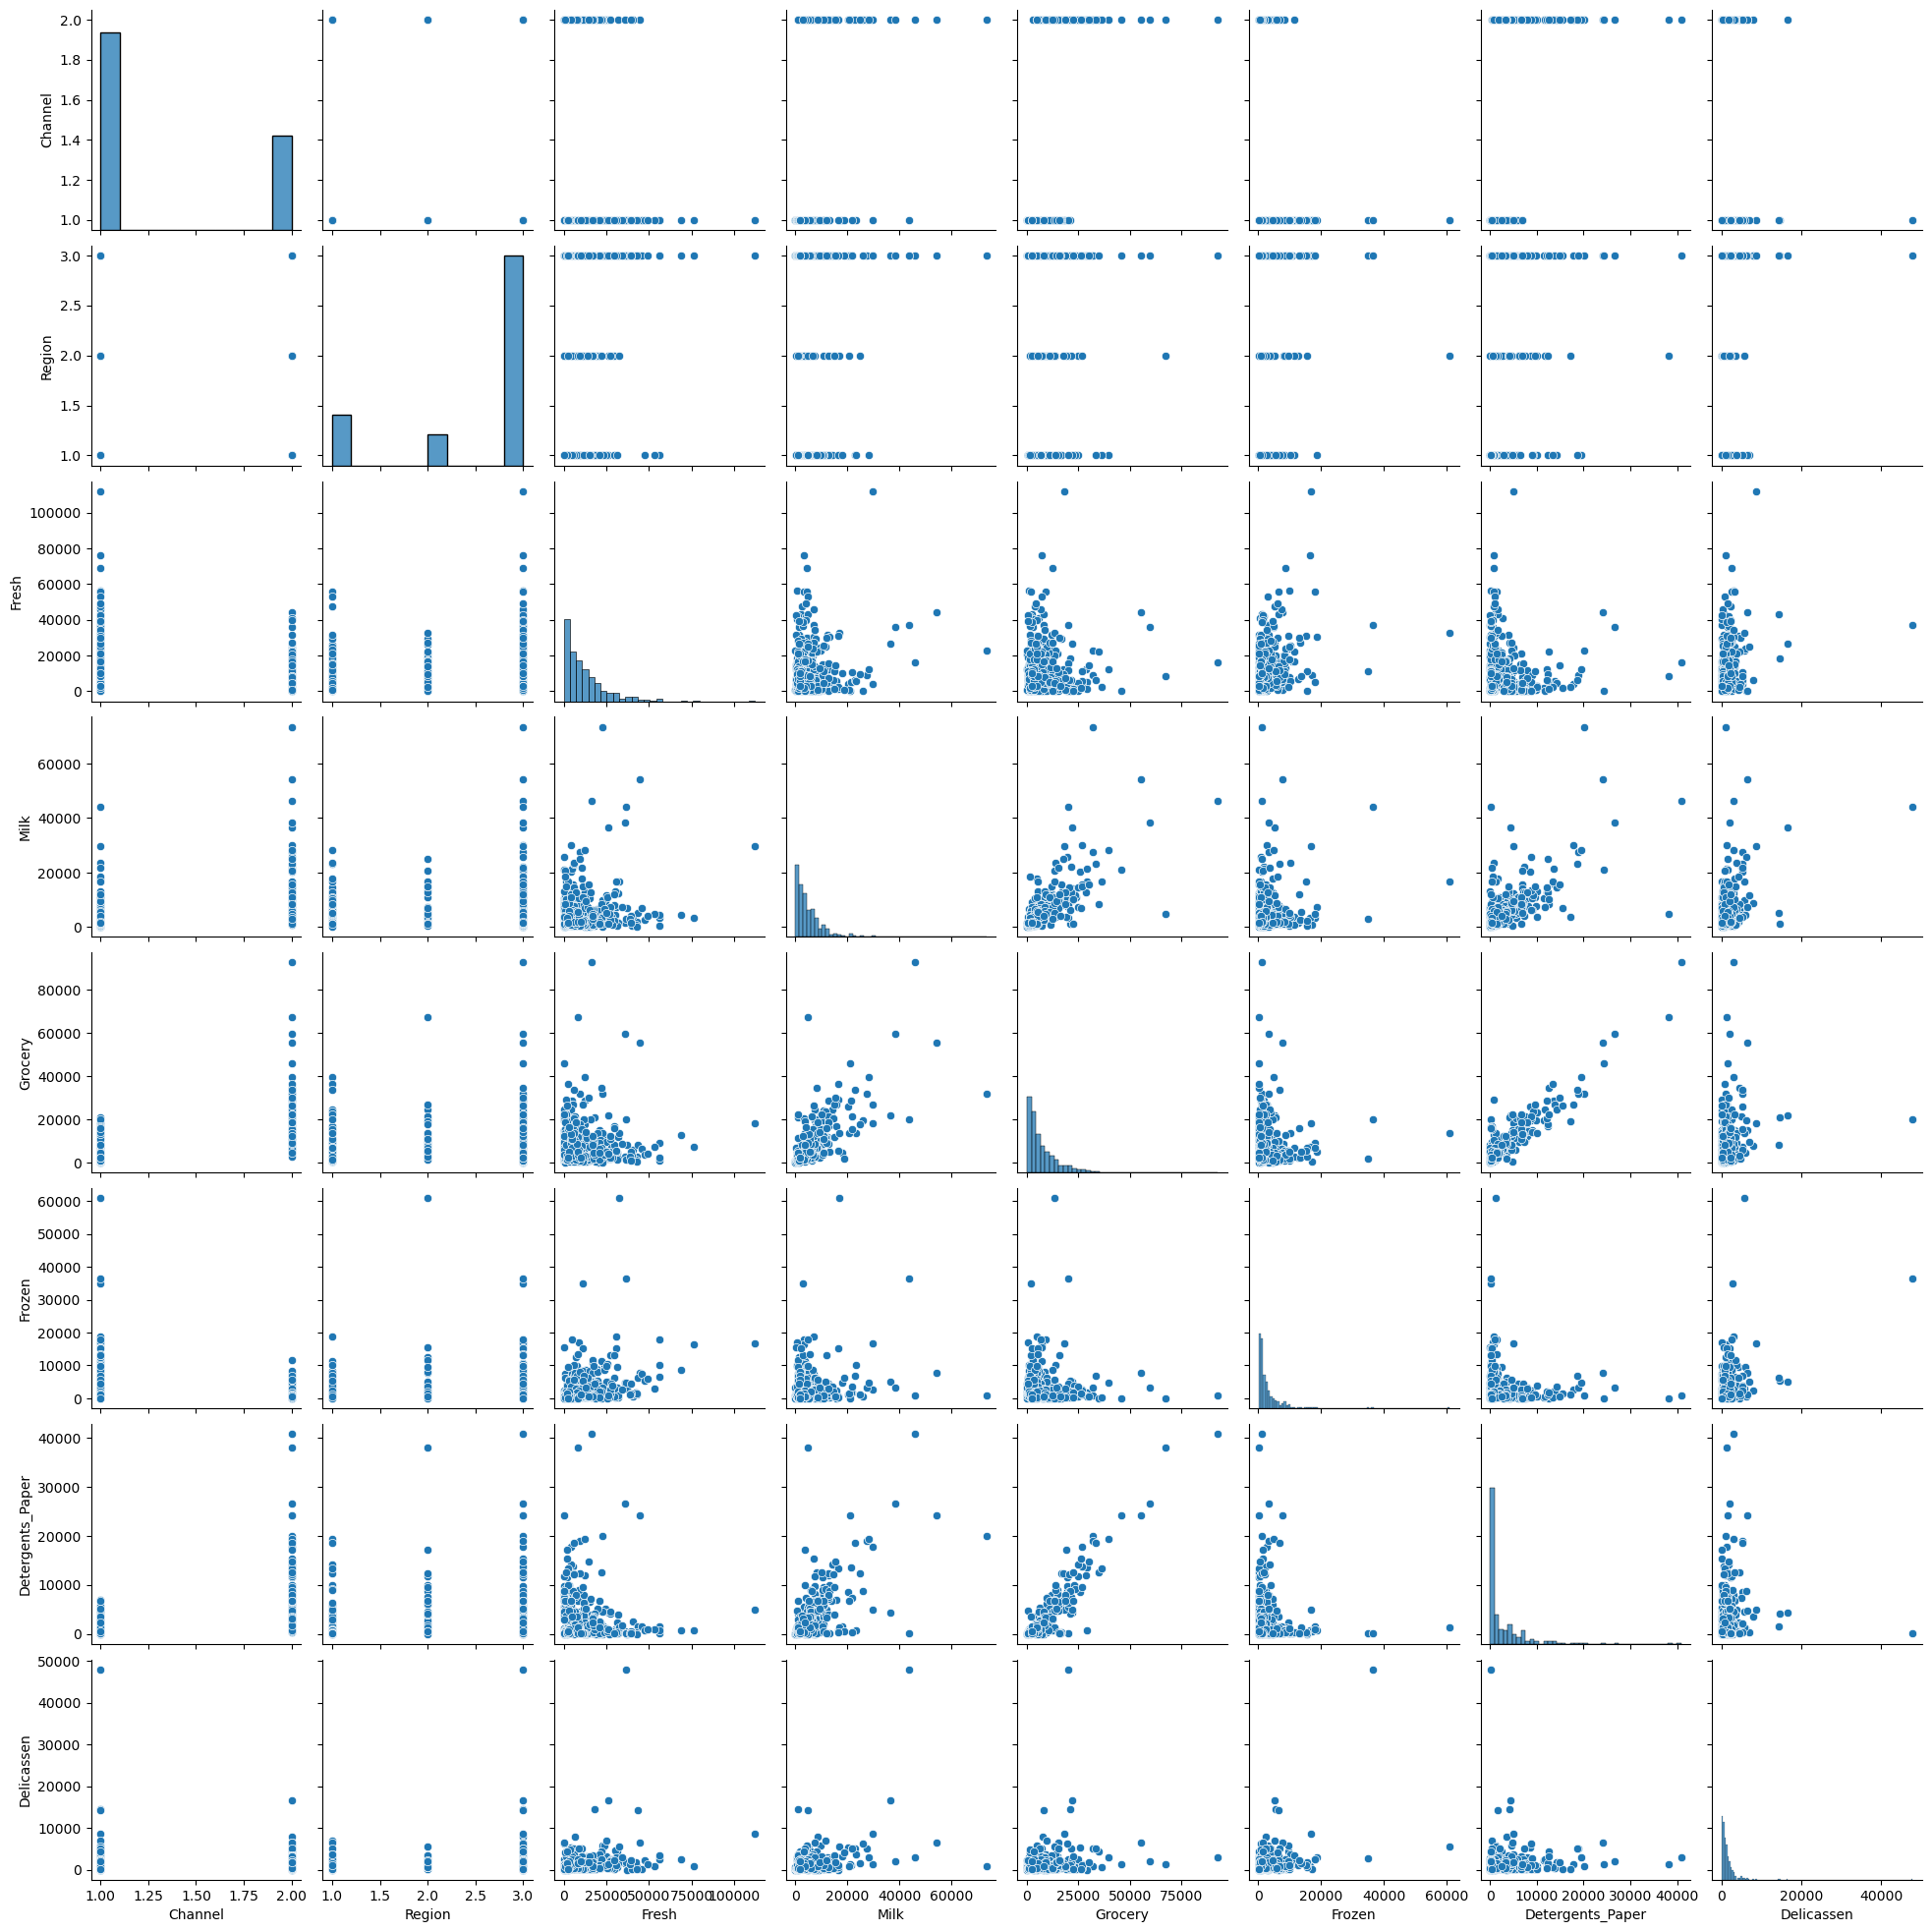

In [5]:
# produce a boxplot of the columns
# to fill

## 3. Use the elbow method to find the optimal number of clusters
Test `KMeans` with varying number of clusters, from 2 to 10

- Prepare the results list that will contain pairs of `inertia` and `silhouette_score` 
- for each value of `k`, 
- __for each value__ of `k` 
    - initialize an estimator for `KMeans`
    - fit the data and predict the cluster assignment for each individual with `fit` and `predict`
    - the __inertia__ is provided in the attribute `inertia_` of the fitted model
    - compute the __silhouette score__  using the function `silhouette_score` from `sklearn.metrics` using as arguments the data and the fitted labels, we will fill the variable `silhouette_scores`
    - store the two values above in the list created at the beginning

In [6]:
# to fill

## 4. Plot __inertia__ and __silhouette score__ versus `k`

In [7]:
def two_plots(x, y1, y2, xlabel, y1label, y2label):
    """
    two_plots - produces two plots with different scales of the values of two
                dependent variables with different scales, one on the left and one on the right, 
                as function of the same independent variable 
    parameters:
    - x     : a range of values for the independent variable  
    - y1, y2: lists of values of the same length of x
    - xlabel: label for the horizontal axis
    - y1label, y2label : labels for the left and right axes
    """
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(y1label, color=color)
    ax1.plot(x, y1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel(y2label, color=color)  # we already handled the x-label with ax1
    ax2.plot(x, y2, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim(0,1) # the axis for silhouette is [0,1]

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

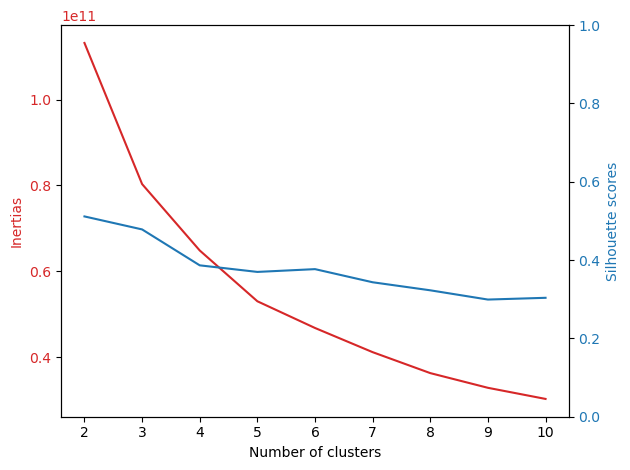

In [8]:
# call two_plots

## 5. Cluster with the optimal number
The main *elbow* point of inertia suggests as cluster number 3. Silhouette has a maximum on 2.

We will choose k=3, due to the *knee* of the inertia, despite the silhouette that would suggest 2

1. initialize the estimator for KMeans with the appropriate parameters
2. fit_predict the estimator and store the preditions in vector y_km
3. print the inertia from the fitted model
4. compute the silhouette score for y_km

In [9]:
# to fill

Number of clusters = 3	- Distortion = 80332414178.03	- Silhouette score = 0.48


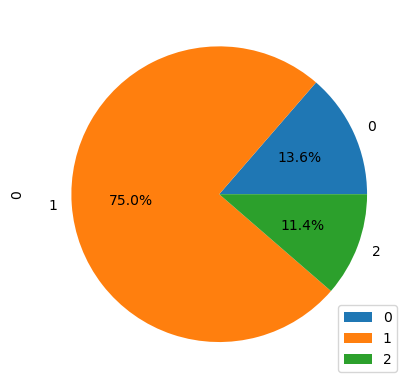

In [10]:
# plot a pie chart of the sizes of the clusters
# use the `np.unique()` function of numpy with `return_counts=True`
# and store the result on `clust_sizes`
# arrange clust_sizes into a dataframe and use the
# `plot.pie` method and the parameter `subplots=True`

### Comments
The __silhouette score__ ranges from `-1` (worst) to `1` (best); as a rule of thumb, a value greater than `0.5` should be considered acceptable.

### Other attempts
1. rescale the data, reducing all to the range [0,1] with `MinMaxScaler`
2. apply `PowerTransformer` to reduce the impact of *outliers*